# Table of Contents

1. [EDA and Cleaning](01_EDA_and_Cleaning.ipynb)
    - 1.1 [Problem Statement](#1.-Problem-Statement)
    - 1.2 [Data Description](#2.-Data-Description)
    - 1.3 [Missing Values](#5.-Missing-Values) 
    - 1.4 [EDA and cleaning](#6.-Exploratory-Data-Analysis-and-Cleaning)
    
    
2. [Preprocessing and Feature Engineering](02_Preprocessing_and_Feature_Engineering.ipynb)   
    - 2.1 [Feature Engineering](02_Preprocessing_and_Feature_Engineering.ipynb/#3.-Feature-Engineering)
    - 2.2 [Polynomial Features](02_Preprocessing_and_Feature_Engineering.ipynb/#4.-Polynomial-Feature-of-Top-4-Important-Features)
    - 2.3 [One-hot encoding](02_Preprocessing_and_Feature_Engineering.ipynb/#5.-One-hot-encoding)
    - 2.4 [Split training and validation dataset](02_Preprocessing_and_Feature_Engineering.ipynb/#7.-Create-training-and-validation-sets)
 
 
3. [Model Bechmarks](03_Model_Benchmarks.ipynb)
    - 3.1 [Linear regression model](03_Model_Benchmarks.ipynb/#4.-Baseline-Model-Setup)
    - 3.2 [Results](03_Model_Benchmarks.ipynb/#5.-Baseline-model-test-result)
    
    
4. [Model Tuning and Selection](04_Model_Tuning_and_Selection.ipynb)
    - 4.1 [Pipeline](04_Model_Tuning_and_Selection.ipynb/#3._Pipeline)
    - 4.2 [GridSearch](04_Model_Tuning_and_Selection.ipynb/#4._GridSearch)
    - 4.3 [Model Selection](04_Model_Tuning_and_Selection.ipynb/#5.-Comparing-model-performance )
    - 4.4 [Interpretation](04_Model_Tuning_and_Selection.ipynb/#6.-Model-Interpretation )
    
    
5. [Kaggle Submission](05_Kaggle_Submission.ipynb)

# 1. Problem Statement

The main purpose of this data science project is to use simple regression models to accurately predict the home prices in Ames, Iowa. By doing regression analysis, we can confirm the theoretical relationship have in mind. Most likely, there is specific interest in the magnitudes and signs of the coefficients. Throughout the iterative modeling and feature selection processes, we can gain a deeper insight of 80 features relate to the home price and understand better the mechanism behind various models. 

# 2. Data Description
The Ames Housing training dataset provides 2051 homes in Ames and 80 features. For each `Id` in the test set, we must predict the value of the `SalePrice` variable for 879 houses. 

| feature | dype |Description 
| --- | --- | --- | 
| MS SubClass | int64 |
| MS Zoning | object |Identifies the general zoning classification of the sale.
| Lot Frontage | float64 |Linear feet of street connected to property
| Lot Area | int64 |Lot size in square feet
| Street | object |Type of road access to property
| Lot Shape | object |General shape of property
| Land Contour | object |Flatness of the property
| Neighborhood | object |Physical locations within Ames city limits
| Condition 1 | object |Proximity to main road or railroad
| Condition 2 | object |Proximity to main road or railroad (if a second is present)
| Bldg Type | object |Type of dwelling
| House Style | object |Style of dwelling
| Overall Qual | int64 |Overall material and finish quality
| Overall Cond | int64 |Overall condition rating
10 Very Excellent
| Year Built | int64 |Original construction date
| Year Remod/Add | int64 |Remodel date (same as construction date if no remodeling or additions)
| Roof Style | object |Type of roof
Flat Flat
| Roof Matl | object |Roof material
| Exterior 1st | object |Exterior covering on house
| Exterior 2nd | object |Exterior covering on house (if more than one material)
| Mas Vnr Type | object |Masonry veneer type
| Mas Vnr Area | float64 |Masonry veneer area in square feet
| Exter Qual | object |Exterior material quality
| Exter Cond | object |Present condition of the material on the exterior
| Foundation | object |Type of foundation
| Bsmt Qual | object |Height of the basement
| Bsmt Cond | object |General condition of the basement
| Bsmt Exposure | object |Walkout or garden level basement walls
| BsmtFin Type 1 | object | Quality of basement finished area
| BsmtFin Type 2 | object |Quality of second finished area (if present)
| Total Bsmt SF | float64 |Total square feet of basement area
| Heating | object |Type of heating
| Heating QC | object |Heating quality and condition
| Central Air | object |Central air conditioning
| Electrical | object |Electrical system
| Gr Liv Area | int64 |Above grade (ground) living area square feet
| Bsmt Full Bath | float64 |Basement full bathrooms
| Bsmt Half Bath | float64 |Basement half bathrooms
| Full Bath | int64 |Full bathrooms above grade
| Half Bath | int64 |Half baths above grade
| Bedroom AbvGr | int64 |Number of bedrooms above basement level
| Kitchen AbvGr | int64 |Number of kitchens
| Kitchen Qual | object |Kitchen quality
| TotRms AbvGrd | int64 |Total rooms above grade (does not include bathrooms)
| Functional | object |Home functionality rating
| Fireplaces | int64 |Number of fireplaces
| Fireplace Qu | object |Fireplace quality
| Garage Type | object |Garage location
| Garage Yr Blt | float64 |Year garage was built
| Garage Finish | object |Interior finish of the garage Fin Finished
| Garage Cars | float64 |Size of garage in car capacity
| Garage Area | float64 |Size of garage in square feet
| Garage Qual | object |Garage quality
| Garage Cond | object |Garage condition
| Paved Drive | object |Paved driveway
| Wood Deck SF | int64 |Wood deck area in square feet
| Open Porch SF | int64 |Open porch area in square feet
| Enclosed Porch | int64 |Enclosed porch area in square feet
| 3Ssn Porch | int64 |Three season porch area in square feet
| Screen Porch | int64 |Screen porch area in square feet
| Pool Area | int64 |Pool area in square feet
| Mo Sold | int64 |Month Sold
| Yr Sold | int64 |Year Sold
| Sale Type | object |Type of sale
| SalePrice | int64 | the property's sale price in dollars

# 3. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
import csv
warnings.filterwarnings('ignore')

%matplotlib inline

# 4. Import Dataset

In [2]:
train = pd.read_csv('../datasets/train.csv', index_col='Id')

In [3]:
train.shape

(2051, 80)

The dimension of the training dataset is (2051,80). 

# 5. Missing Values

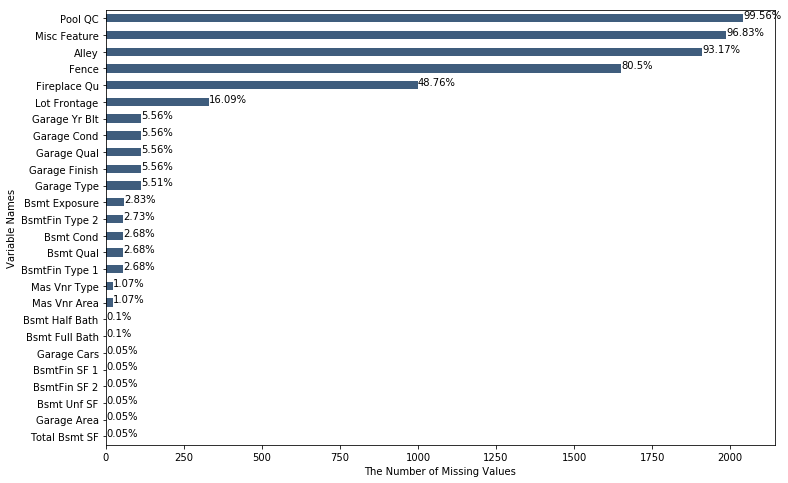

In [4]:
Null = train.isnull().sum()[train.isnull().sum()>0]
Null.sort_values().plot(kind='barh', figsize=(12, 8), color = "#3F5D7D");
for y, x in enumerate(Null.sort_values()):
    plt.annotate(str(round(x/2051*100,2))+'%', xy=(x, y), size=10,)
plt.xlabel('The Number of Missing Values');
plt.ylabel('Variable Names');

### If there are more than 80% of data are missing in the columns, these columns can be discarded.

In [5]:
train.drop(Null[Null/len(train)>0.8].index, axis=1, inplace=True)

### Impute the variable `Lot Frontage` based on the relationship with the variable `Lot Area`.

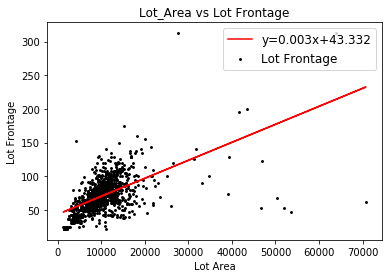

In [6]:
mask = train['Lot Frontage'].isnull() == False
Lot_x = train[mask]['Lot Area']
Lot_y = train[mask]['Lot Frontage']
slope, intercept, r_value, p_value, std_err = stats.linregress(Lot_x,Lot_y) # reference: stats model libraray
line = slope*Lot_x+intercept
plt.plot(Lot_x, line, 'r', label='y={:.3f}x+{:.3f}'.format(slope,intercept));

plt.scatter(Lot_x,Lot_y, color="k", s=3.5);
plt.legend(fontsize = 12);
plt.xlabel('Lot Area');
plt.ylabel('Lot Frontage');
plt.title('Lot_Area vs Lot Frontage');

From the scatter plot, the values of Lot Frontage and the values of Lot Area should have a liner relationship.

In [7]:
train['Lot Frontage'] = train.apply(lambda row: round(row['Lot Area']*0.003 +43.332,1)
                                     if np.isnan(row['Lot Frontage']) else row['Lot Frontage'],axis =1)

### Based on the data description, there are several columns that containing NA which are not the actual missing values but the 'None' of these features. Numerical features containing an NA will be set to 0, categorical features containing an NA will be set to string value 'None'.

In [8]:
train.fillna(train[['Fireplace Qu', 'Garage Finish','Garage Qual','Garage Cond',
                    'Garage Type', 'Bsmt Cond', 'Bsmt Qual', 'Bsmt Exposure', 
                    'BsmtFin Type 1', 'BsmtFin Type 2','Mas Vnr Type']].fillna('None'),inplace=True)

train.fillna(train[['Bsmt Half Bath','Bsmt Full Bath','BsmtFin SF 1','BsmtFin SF 2',
                    'Bsmt Unf SF','Total Bsmt SF','Mas Vnr Area','Garage Cars',
                    'Garage Area']].fillna(0),inplace=True)

### Fill the `Garage Yr Blt` with the same value as `Year Built` of the house instead of zero.

In [9]:
train['Garage Yr Blt'] = train.apply(lambda row: row['Year Built'] 
                                     if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)

### Check for the missing values

In [10]:
train.isnull().sum().sum()

0

# 6. Exploratory Data Analysis and Cleaning

### Let's look at the distribution of the target variable `SalePrice`.

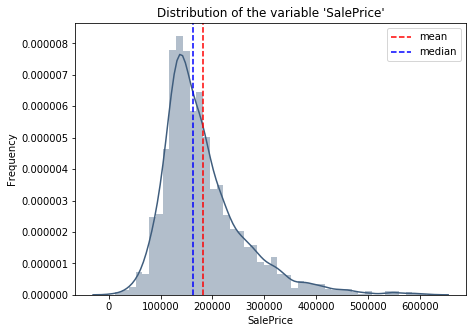

In [11]:
plt.figure(figsize=(7,5))
sns.distplot(train['SalePrice'], color="#3F5D7D");
plt.ylabel('Frequency')
plt.title("Distribution of the variable 'SalePrice'");
plt.axvline(train['SalePrice'].mean(), linestyle = '--', color = 'r', label ='mean')
plt.axvline(train['SalePrice'].median(), linestyle = '--', color = 'b', label ='median')
plt.legend();

The distribution of the `SalePrice` is right-skewed, the outliers can be observed in the data. Drop the rows that `SalePrice` lower than \$20000 and higher than \\$600000.

In [12]:
train[(train['SalePrice'] < 20000)|(train['SalePrice'] > 600000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1554,910251050,20,A (agr),80.0,14584,Pave,Reg,Low,AllPub,Inside,...,0,0,0,0,0,0,2,2008,WD,13100
182,902207130,30,RM,68.0,9656,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2010,WD,12789
45,528150070,20,RL,100.0,12919,Pave,IR1,Lvl,AllPub,Inside,...,67,0,0,0,0,0,3,2010,New,611657


In [13]:
train.drop([1554,182,45],0,inplace=True)

### Fix the error in the variable `Garage Yr Blt`

In [14]:
train[train['Garage Yr Blt'] >2020]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2261,916384070,20,RL,68.0,8298,Pave,IR1,HLS,AllPub,Inside,...,0,0,0,0,0,0,9,2007,New,267300


In [15]:
train.loc[2261,'Garage Yr Blt'] = 2007

## Categorical features  vs `SalePrice`

In [16]:
def subplot_boxplot(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    ax = ax.ravel() 
    if len(list_of_columns) %2 !=0:
        ax[len(list_of_columns)].set_visible(False)
    for i, column in enumerate(list_of_columns):
        names = train.groupby(column).mean()['SalePrice'].sort_values().index
        sns.boxplot(dataframe[column],dataframe['SalePrice'],order = names, ax = ax[i], color="#3F5D7D") 
        ax[i].set_title(f' " SalePrice" vs "{column}"', fontsize =18)
        ax[i].set_ylabel('Values',fontsize=15)
        ax[i].set_xlabel(column,fontsize=15) 
        ax[i].set_xticklabels(names,rotation=40) 
    plt.tight_layout()

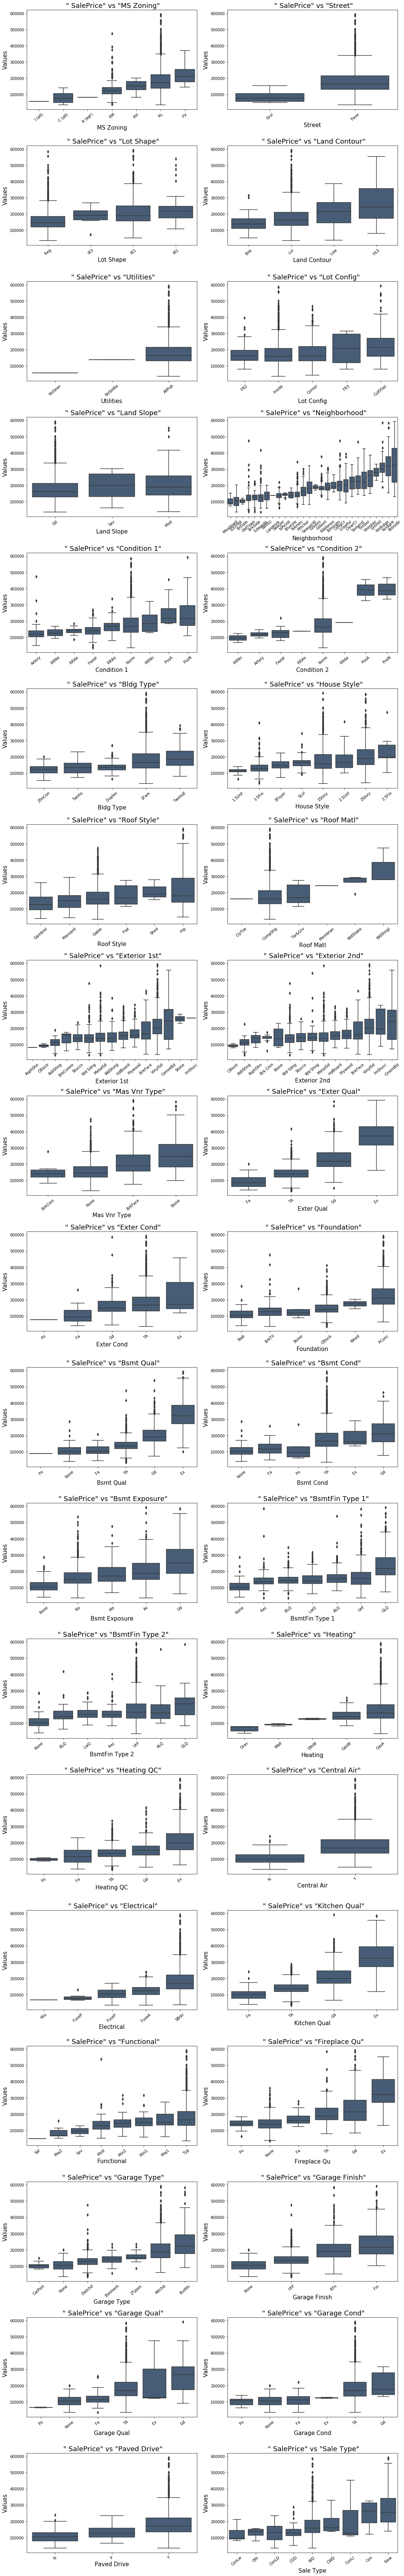

In [17]:
Cat_columns = train.select_dtypes(include = 'object').columns
subplot_boxplot(train,Cat_columns)

According to the boxplots of categorical features, the `Lot Config`, and `Land Slope` don't have linear relationships with the target variable `SalePrice`. The `Utilities`'s values are mostly 'Allpub' which is the low variance variable. Therefore, the features of `Lot Config`,`Land Slope` and `Utilities` can be dropped from the training dataset. 

In [18]:
train.drop(['Lot Config','Land Slope','Utilities'], axis =1, inplace=True)

##  Numerical features  vs `SalePrice`

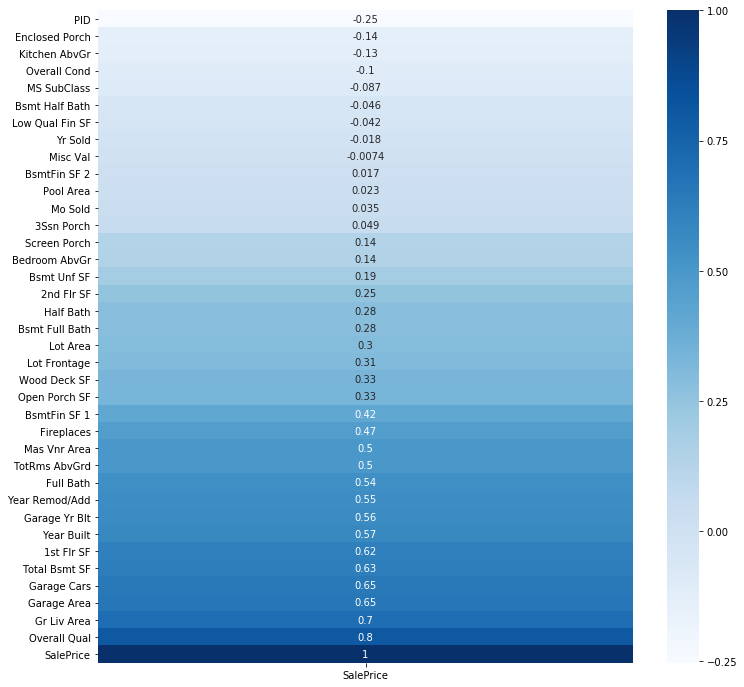

In [19]:
plt.figure(figsize = (12,12))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'), annot=True,cmap ='Blues');

No relationship between `PID` and `Sale Price`, drop the `PID` column.

In [20]:
# Drop the irrelated data columns 
train.drop(['PID'],axis =1, inplace=True)

The variables that highly correlated with the `SalePrice` are `Overall Qual`, `Gr Liv Area`, `Garage Cars`, and `Garage Area`. The least correlated variable is the `Misc Val`. The column of `Misc Val` can be discarded consider the low linear relationship with the target variable and this feature is hard to engineer since the `Misc Feature` is also dropped in the beginning.

In [21]:
train.drop(['Misc Val'], axis=1, inplace=True)

### Relationship between `Total Bsmt SF` and `BsmtFin SF 1`, `BsmtFin SF 2`, `Bsmt Unf SF`

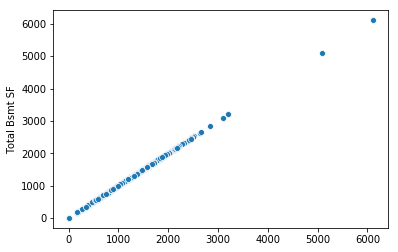

In [22]:
sns.scatterplot(train['BsmtFin SF 1']+train['BsmtFin SF 2']+train['Bsmt Unf SF'],train['Total Bsmt SF']);

This is obvious that  `Total Bsmt SF` = `BsmtFin SF 1`+ `BsmtFin SF 2`+ `Bsmt Unf SF`, I decide to keep only the variable `Total Bsmt SF` since the total basement square feet is an important feature whereas other variables contain basement square feet information will add noise to the model. 

In [23]:
train.drop(['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF'], 1, inplace=True)

### Relationship between `Gr Liv Area` and `1st Flr SF`, `2nd  Flr SF`, `Low Qual Fin SF`

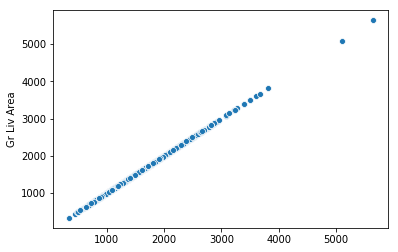

In [24]:
sns.scatterplot(train['1st Flr SF']+train['2nd Flr SF']+train['Low Qual Fin SF'],train['Gr Liv Area']);

Similar to the `Total Bsmt SF`, the `Gr Liv Area` is the consist of `1st Flr SF`, `2nd  Flr SF`, `Low Qual Fin SF`. Drop the variables `1st Flr SF`, `2nd  Flr SF`, `Low Qual Fin SF`, only keep the `Gr Liv Area`.

In [25]:
train.drop(['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF'], 1, inplace=True)

The scatter plot can be useful for looking at the linear relationship between the target variable and the variables which have the correlation coefficient higher than 0.25.

In [26]:
def subplot_scatter(dataframe, x):
    nrows = int(np.ceil(len(x)/2)) # Makes sure you have enough row
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    if len(x) %2 !=0:
        ax[len(x)].set_visible(False)
    for i in range(len(x)): # Gives us an index value to get into all our lists
        sns.scatterplot(dataframe[x[i]],dataframe['SalePrice'] ,ax = ax[i],color="#3F5D7D") # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(x[i] +' vs SalePrice', fontsize =18)
        ax[i].set_ylabel('SalePrice',fontsize=15)
        ax[i].set_xlabel(x[i],fontsize=15);
        ax[i].spines["top"].set_visible(False)  
        ax[i].spines["right"].set_visible(False)  
    plt.tight_layout()

In [27]:
high_corr = (abs(train.corr()[['SalePrice']])>0.25)['SalePrice']
corr_features = train.corr()[['SalePrice']][high_corr][:-1].index

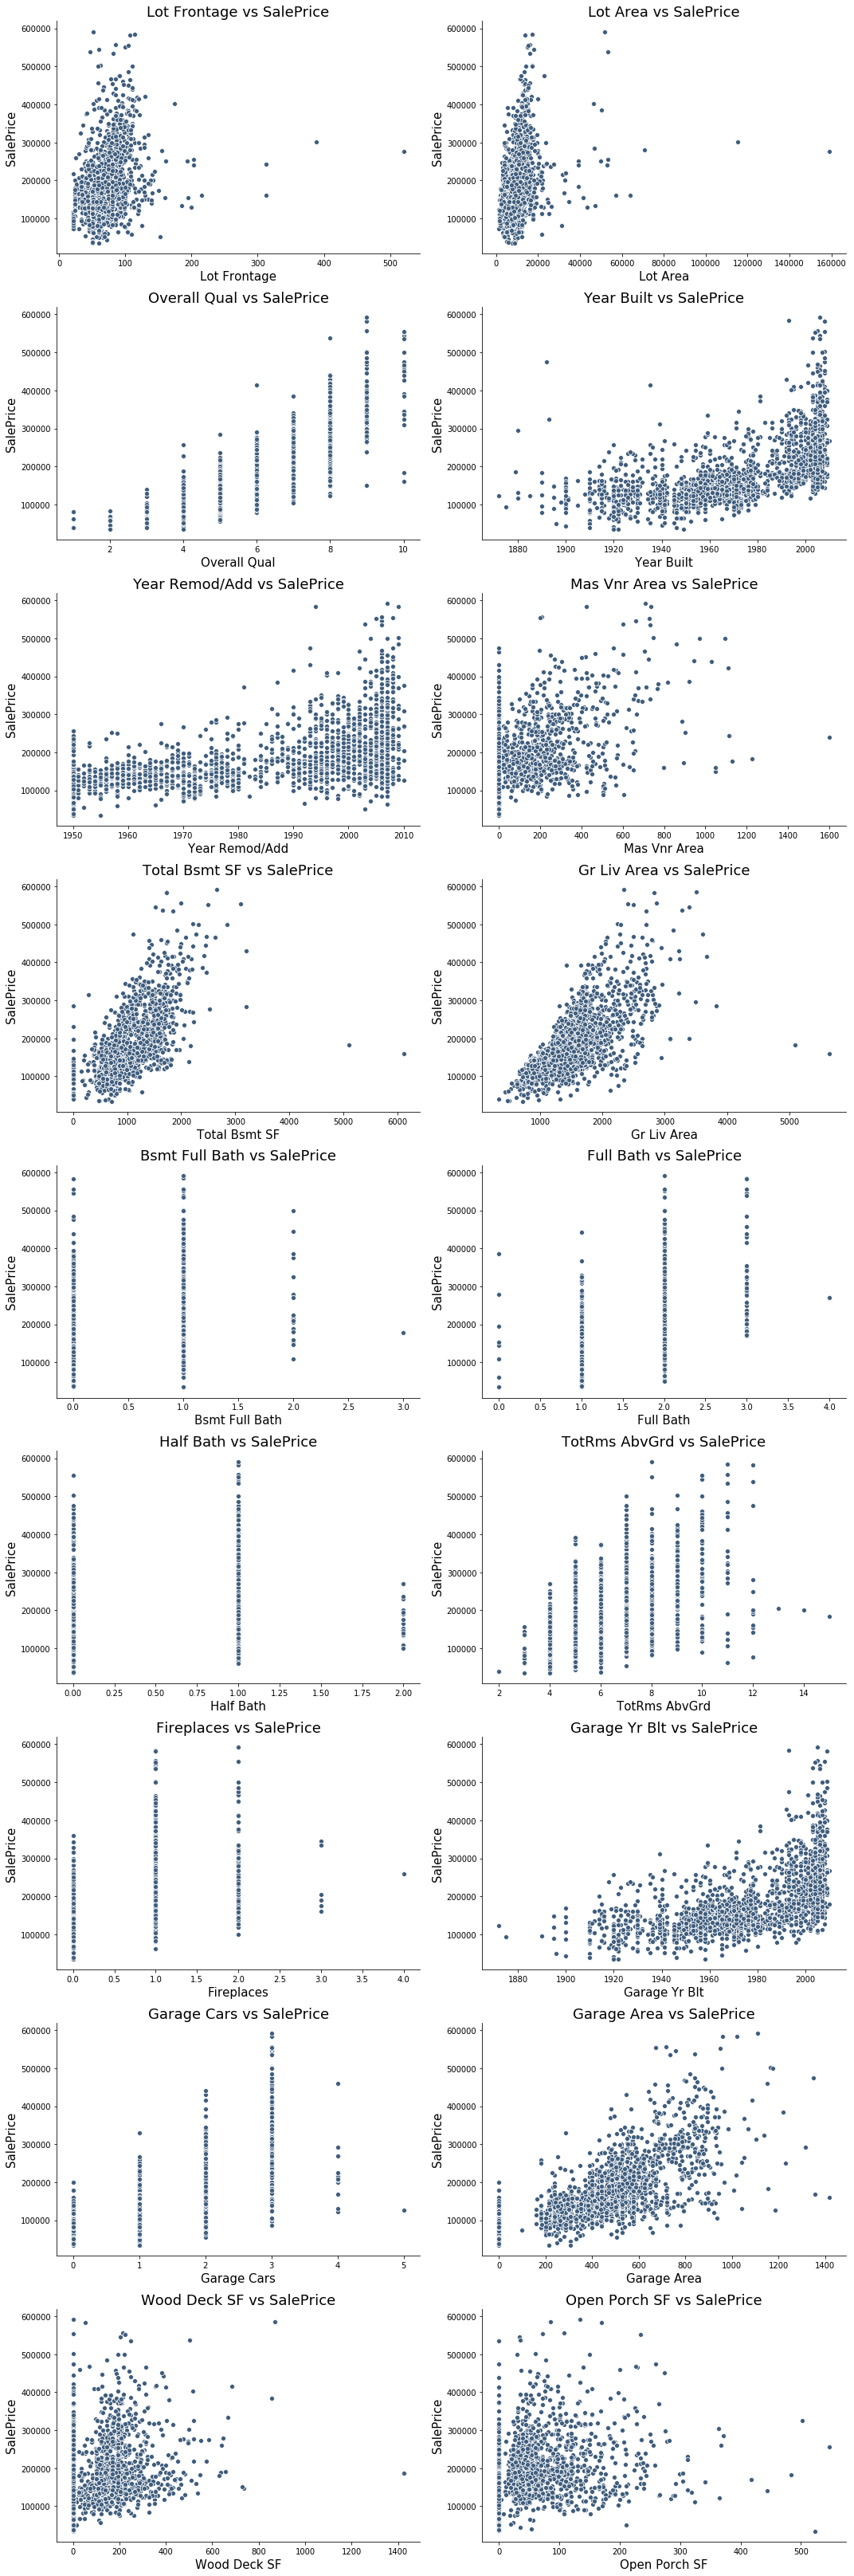

In [28]:
subplot_scatter(train,corr_features)

Filter the training dataset in order to include only categorical variables and numerical variables which have high linear relationship with target variable `SalePrice`.

In [29]:
Category = train.select_dtypes(include = 'object').columns
high_corr = (abs(train.corr()[['SalePrice']])>0.25)['SalePrice']
corr_gt_25 = train.corr()[['SalePrice']][high_corr].index

In [30]:
train_clean = pd.concat([train[Category],train[corr_gt_25]],axis=1)

In [31]:
train_clean.shape

(2048, 54)

# 7. Export cleaned data for use in future notebooks

In [32]:
train_clean.to_csv('../datasets/train_clean.csv')

# 8. Additional plots

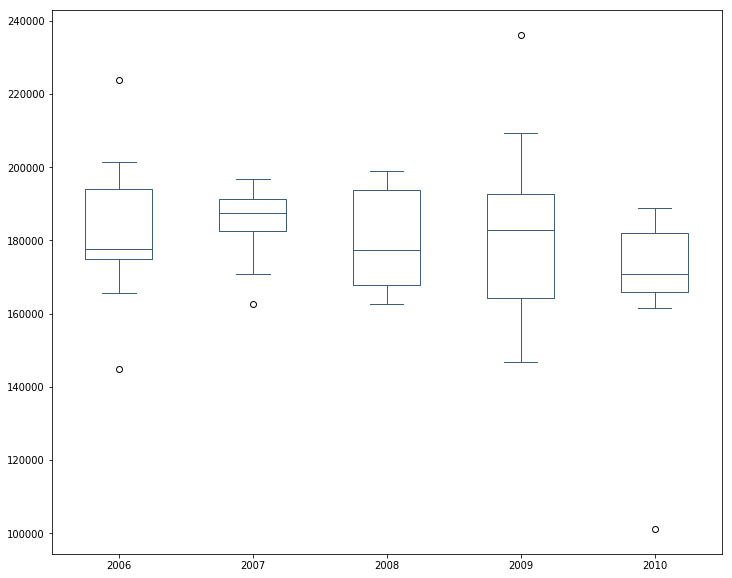

In [88]:
train.pivot_table(values='SalePrice',columns=['Yr Sold'], index=['Mo Sold']).plot(kind='box',
                                                                                  figsize=(12,10),
                                                                                  color="#3F5D7D",
                                                                                )

Text(0.5, 1.0, 'Sales Prices of Homes Sold from 2006 to 2010')

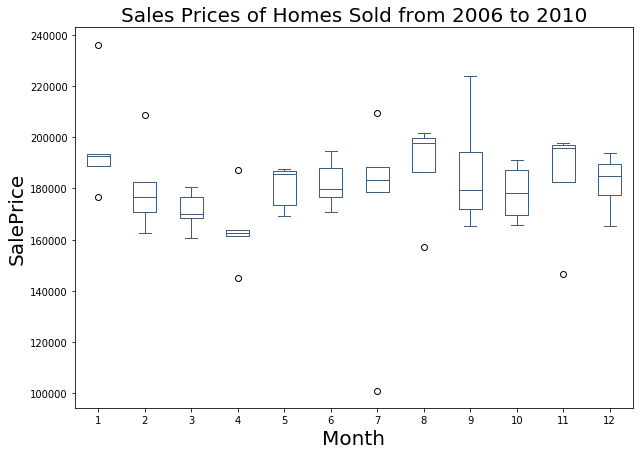

In [98]:
train.pivot_table(values='SalePrice',columns=['Mo Sold'], index=['Yr Sold']).plot(kind='box',
                                                                                  figsize=(10,7),
                                                                                  color="#3F5D7D",
                                                                                )
plt.xlabel('Month',fontsize=20)
plt.ylabel('SalePrice',fontsize=20)
plt.title('Sales Prices of Homes Sold from 2006 to 2010',fontsize=20)

SalePrices of house are low in April. 

Text(0.5, 1.0, 'Sales Prices of Homes vs Overall Quality')

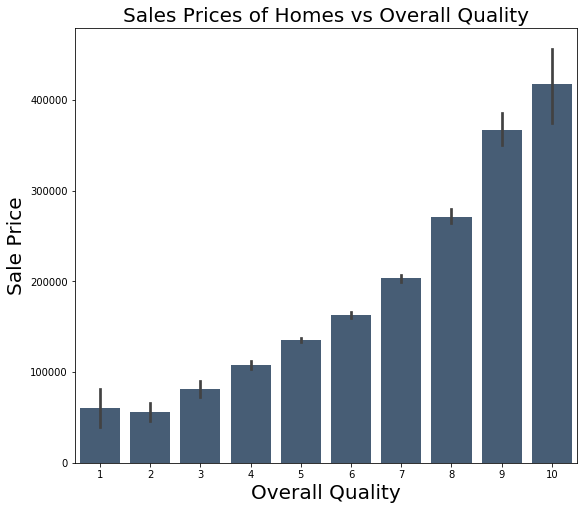

In [107]:
plt.figure(figsize=(9,8))
sns.barplot(train['Overall Qual'],train['SalePrice'] ,color="#3F5D7D")
plt.xlabel('Overall Quality',fontsize=20)
plt.ylabel('Sale Price',fontsize=20)
plt.title('Sales Prices of Homes vs Overall Quality',fontsize=20)